# SVHN - Inference on custom images
This notebook runs the sequence detection models on custom images. To use it, create a folder **custom** in **../inputs/** folder. Copy your images there and run this notebook to the end. It picks up all images in custom folder and tries to generate predictions on them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from scipy import misc
from keras.utils import np_utils
import graphics

image_size = (54,128)
max_digits = 7

%matplotlib inline

Using TensorFlow backend.


In [2]:
import os

def loadImages(path):
    Ximg = []
    for filename in os.listdir(path):
        if filename.endswith('png') or filename.endswith('jpg'):
            rawimage = misc.imread(path+filename)
            img = misc.imresize(rawimage, size=image_size, interp='bilinear')
            Ximg.append(img)
    return np.array(Ximg)

In [3]:
# load models
model_yaml = open('../checkpoints/model.yaml','r')
model = keras.models.model_from_yaml(model_yaml.read())
model_yaml.close()
model.load_weights('../checkpoints/model.hdf5')

vision = model.layers[1]
counter = model.layers[3]
detector = model.layers[4]

In [23]:
Ximg = loadImages('../inputs/custom/')

h = vision.predict(Ximg)
ycount = counter.predict(h)
ycount = np.argmax(ycount, axis=1)

ylabel = []
for i in range(len(ycount)):
    # generate range for each count
    indices = np.arange(ycount[i])
    # one hot encoding for each index
    indices = np_utils.to_categorical(indices, max_digits)
    # tile h to match shape of indices matrix
    hs = np.tile(h[i], (ycount[i],1))
    
    # predict labels for the sample
    sample_seq = detector.predict([hs, indices])
    sample_seq = np.argmax(sample_seq,1)
    ylabel.append(sample_seq)

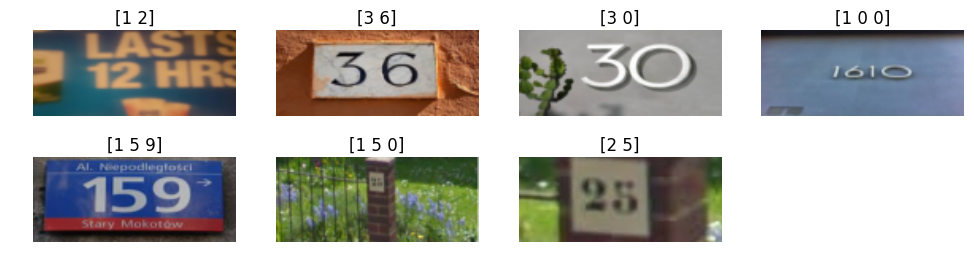

In [24]:
plt.figure(figsize=(12,3))
for i in range(min(8,len(Ximg))):
    plt.subplot(2,4,i+1)
    plt.imshow(Ximg[i])
    plt.axis('off')
    plt.title("{}".format(ylabel[i]))

32 convolutions in layer 1


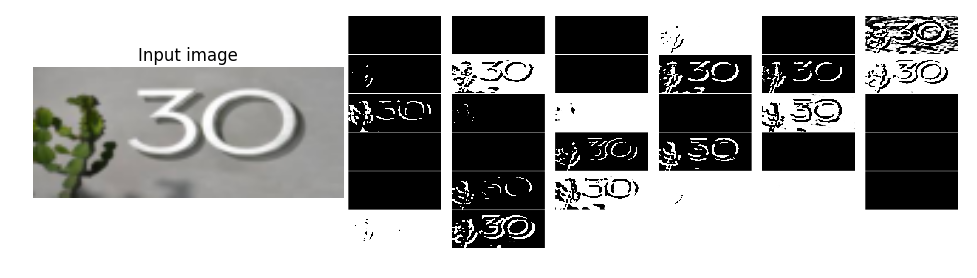

In [36]:
graphics.showCNNConv(vision, 1, Ximg[2])